# Assignment 5: Exercise 1, Question (d)

In [3]:
%%html
<style>
.output_wrapper, .output {
    height:auto !important;
    max-height:10000px;  /* your desired max-height here */
}
.output_scroll {
    box-shadow:none !important;
    webkit-box-shadow:none !important;
}
</style>

Plot the Sharpe ratio on the optimal portfolio as a function of the risk-aversion level.


 The tangency portfolio is: 
[0.4407 0.2886 0.2707]

 Its expected return, variance and Sharpe Ratio is: 
0.1122
0.0226
0.414

 The zero-beta portfolio is: 
[ 1.9099 -0.2748 -0.6351]

 Its expected return, variance and Sharpe Ratio is: 
0.05
0.0986
-0.0

 The cut-off level of risk-aversion below which the investor is constrained is: 
2.2963

  
2.7555555555555564

  
[1.21428571 0.7952381  0.74603175]

  
[-0.75396825  0.28911565  0.46485261]
[0.85714286 0.22040816 0.12244898]

  
0.5131642975488448
0.9765252252609873


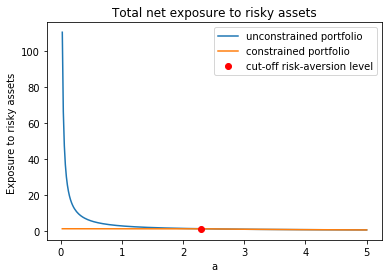

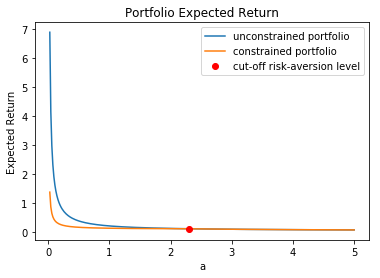

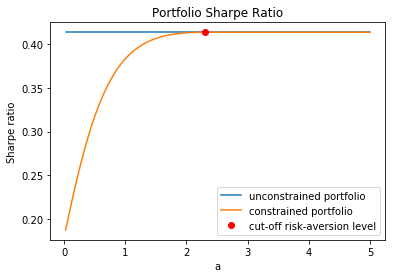

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
mu    = np.array([0.09, 0.12, 0.14])
sigma = np.array([0.15, 0.25, 0.30])
ones=np.ones(3)
rho   = 0.2
R0    = 0.05
m     = 1.20
cov   = np.array([[sigma[0]**2,rho*sigma[0]*sigma[1],rho*sigma[0]*sigma[2]],\
                  [rho*sigma[0]*sigma[1],sigma[1]**2,rho*sigma[1]*sigma[2]],\
                  [rho*sigma[2]*sigma[0],rho*sigma[2]*sigma[1],sigma[2]**2]])



# Grid of levels of risk aversion
a = np.linspace(0.025,5,300)

# Auxiliary calculation
vec1 = np.ones(3)
cov_inv = np.linalg.inv(cov)

A = vec1.transpose()@(cov_inv@vec1)
B = vec1.transpose()@(cov_inv@mu)
C = mu.transpose()@(cov_inv@mu)
DELTA = A*C-B**2

# Tangency portfolio
w_t    = (cov_inv@(mu-R0*vec1))/(B-A*R0)
mu_t   = w_t.transpose()@mu
sig2_t = w_t.transpose()@(cov@w_t)
SR_t   = (mu_t-R0)/np.sqrt(sig2_t)

# Zero-beta portfolio
lda_z  = (C-R0*B)/DELTA
gam_z  = (R0*A-B)/DELTA

w_z    = lda_z*(cov_inv@vec1)+gam_z*(cov_inv@mu)
mu_z   = w_z.transpose()@mu
sig2_z = w_z.transpose()@(cov@w_z)
SR_z   = (mu_z-R0)/np.sqrt(sig2_z)

print('\n The tangency portfolio is: ')
print(np.around(w_t,4))

print('\n Its expected return, variance and Sharpe Ratio is: ')
print(np.around(mu_t,4))
print(np.around(sig2_t,4))
print(np.around(SR_t,4))

print('\n The zero-beta portfolio is: ')
print(np.around(w_z,4))

print('\n Its expected return, variance and Sharpe Ratio is: ')
print(np.around(mu_z,4))
print(np.around(sig2_z,4))
print(np.around(SR_z,4))



# Cut-off risk-aversion level such that the agent is unconstrained
a_star   = SR_t/(m*np.sqrt(sig2_t))
bool_unc = (a>=a_star)

print('\n The cut-off level of risk-aversion below which the investor is constrained is: ')
print(np.around(a_star,4))

# Fractions invested in tangency and zero-beta portfolio
x_t_unc = np.divide(SR_t/np.sqrt(sig2_t),a)
x_z_unc = np.zeros(len(a))

x_t_con = np.divide((mu_t-mu_z)/(sig2_t+sig2_z),a)+m*sig2_z/(sig2_t+sig2_z)
x_z_con = np.divide(-(mu_t-mu_z)/(sig2_t+sig2_z),a)+m*sig2_t/(sig2_t+sig2_z)

x_t = np.multiply(x_t_unc,bool_unc)+np.multiply(x_t_con,1-bool_unc)
x_z = np.multiply(x_z_unc,bool_unc)+np.multiply(x_z_con,1-bool_unc)

print('\n  ')
print(SR_t/np.sqrt(sig2_t))
print('\n  ')
print(cov_inv@(mu-R0*vec1))
print('\n  ')
print(np.multiply((mu_t-mu_z)/(sig2_t+sig2_z),w_t)+np.multiply(-(mu_t-mu_z)/(sig2_t+sig2_z),w_z))
print(np.multiply(m*sig2_z/(sig2_t+sig2_z),w_t)+np.multiply(m*sig2_t/(sig2_t+sig2_z),w_z))
print('\n  ')
print((mu_t-mu_z)/(sig2_t+sig2_z))
print(m*sig2_z/(sig2_t+sig2_z))

# Optimal portfolio
mu_star  = (C-B*R0)/a_star+(1-(B-A*R0)/a_star)*R0
mu_unc   = np.divide(C-B*R0,a)+(1-np.divide(B-A*R0,a))*R0
mu_con   = R0+x_t*(mu_t-R0)
sig2_con = x_t**2*sig2_t+x_z**2*sig2_z
SR_con   = np.divide(mu_con-R0,np.sqrt(sig2_con))

SR_p = np.multiply(SR_t,bool_unc)+np.multiply(SR_con,1-bool_unc)

# Optimal constrained portfolio
plt.plot(a,x_t_unc,label='unconstrained portfolio')
plt.plot(a,x_t+x_z,label='constrained portfolio')
plt.plot(a_star,m,'ro',label='cut-off risk-aversion level')
plt.title('Total net exposure to risky assets')
plt.xlabel('a')
plt.ylabel('Exposure to risky assets ')
plt.legend()
plt.show()

plt.plot(a,mu_unc,label='unconstrained portfolio')
plt.plot(a,mu_con,label='constrained portfolio')
plt.plot(a_star,mu_star,'ro',label='cut-off risk-aversion level')
plt.title('Portfolio Expected Return')
plt.xlabel('a')
plt.ylabel('Expected Return')
plt.legend()
plt.show()

plt.plot(a,SR_t*np.ones(len(a)),label='unconstrained portfolio')
plt.plot(a,SR_con,label='constrained portfolio')
plt.plot(a_star,SR_t,'ro',label='cut-off risk-aversion level')
plt.title('Portfolio Sharpe Ratio')
plt.xlabel('a')
plt.ylabel('Sharpe ratio')
plt.legend()
plt.show()



# Assignment 5: Exercise 3

In [14]:
print(0.2/np.sqrt(10)*2)
print(0.2/np.sqrt(100)*2)

0.126491106407
0.04


# Assignment 5: Exercise 4

In [329]:


import wrds
db=wrds.Connection(wrds_username='sevogel')
from datetime import datetime
db.create_pgpass_file()



Loading library list...
Done
Enter your WRDS username [sevogel]:sevogel
Enter your password:········


In [330]:
data=db.raw_sql("select permno, date,ret "
           "from crsp.msf "
           "where permno in (17778) "
           "and date>='1975-12-31'"
            "and date<='2019-12-31'", date_cols=['date'])


In [331]:
from datetime import datetime
import pandas as pd
import numpy as np


factors = pd.read_csv('F-F_Research_Data_5_Factors_2x3.txt',delimiter="\s+")
factors=factors.reset_index()
factors=factors.rename(columns={"index": "date"})

mom = pd.read_csv('F-F_Momentum_Factor.txt',delimiter="\s+")
mom=mom.reset_index()
mom=mom.rename(columns={"index": "date"})

In [332]:

#factors["date"]=factors["date"].str
factors["year"]=factors["date"].astype(str).str.slice(stop=4).astype(int)
factors["month"]=factors["date"].astype(str).str.slice(start=-2).astype(int)

mom["year"]=mom["date"].astype(str).str.slice(stop=4).astype(int)
mom["month"]=mom["date"].astype(str).str.slice(start=-2).astype(int)


data["date"]=data["date"].dt.strftime("%Y-%m-%d")
data["year"]=data["date"].str.slice(stop=4).astype(int)
data["month"]=data["date"].str.slice(start=5, stop=7).astype(int)

del factors['date']
del mom['date']

factors["Mkt-RF"]=factors["Mkt-RF"]/100
factors["SMB"]=factors["SMB"]/100
factors["HML"]=factors["HML"]/100
factors["RMW"]=factors["RMW"]/100
factors["CMA"]=factors["CMA"]/100
factors["RF"]=factors["RF"]/100
mom["Mom"]=mom["Mom"]/100

data=pd.merge(data,factors, on=["year","month"],how="left")
data=pd.merge(data,mom, on=["year","month"],how="left")
data["BRK"]=data["ret"]-data["RF"]
ret = data[['BRK', 'Mkt-RF', 'SMB', 'HML', 'Mom', 'RMW', 'CMA']]

In [333]:
tab_col = ['BRK','Mkt-RF']
tab_ind = ['Mean (ann.)','Std (ann.)','SR (ann.)']

df_sumstat = pd.DataFrame(data=str(np.empty((3, 2))), index=tab_ind, columns=tab_col)
df_sumstat.loc[tab_ind[0]] = np.around(ret[tab_col].mean()*12,5)
df_sumstat.loc[tab_ind[1]] = np.around(ret[tab_col].std()*np.sqrt(12),5)
df_sumstat.loc[tab_ind[2]] = np.around(np.divide(ret[tab_col].mean(),ret[tab_col].std())*np.sqrt(12),3)
df_sumstat.loc[tab_ind[0]] = df_sumstat.loc[tab_ind[0]].apply(lambda n: '{0:.2%}'.format(n))
df_sumstat.loc[tab_ind[1]] = df_sumstat.loc[tab_ind[1]].apply(lambda n: '{0:.2%}'.format(n))

display(df_sumstat)


import statsmodels.regression.linear_model as lm

lab_columns = ['cst.']
lab_columns = lab_columns + ret.columns.values.tolist() + ['R2','R2 adj','IR (ann.)']
del lab_columns[1]
lab_ind_tmp = ['mod1','tstat1','mod2','tstat2','mod3','tstat3','mod4','tstat4']
lab_indexes = ['Model 1','t-stats','Model 2','t-stats','Model 3','t-stats','Model 4','t-stats']
mod_spec    = [1,3,4,6]

df_data = pd.DataFrame(data=str(np.empty((8, 10))), columns=lab_columns,index=lab_ind_tmp)
for j in range(4): 

    # model specification
    y = ret['BRK']
    x = ret.iloc[:,1:1+mod_spec[j]]
    X = lm.add_constant(x)

    model = lm.OLS(endog=y,exog=X,missing='drop')
    results = model.fit()
    
    # update table
    df_data.loc[lab_ind_tmp[(j+1)*2-2]] = ""
    df_data.loc[lab_ind_tmp[(j+1)*2-1]] = ""
    df_data.loc[lab_ind_tmp[(j+1)*2-2]].iloc[0:1+mod_spec[j]] = np.around(results.params.values,3)
    #df_data.loc[lab_ind_tmp[(j+1)*2-1]].iloc[0:1+mod_spec[j]] = np.around(results.tvalues.values,2)
    df_data.loc[lab_ind_tmp[(j+1)*2-1]].iloc[0:1+mod_spec[j]] = \
        np.around(np.divide(results.params.values,results.HC0_se.values),2)
    df_data.loc[lab_ind_tmp[(j+1)*2-2]].iloc[7] = np.around(results.rsquared,2)
    df_data.loc[lab_ind_tmp[(j+1)*2-2]].iloc[8] = np.around(results.rsquared_adj,2)
    df_data.loc[lab_ind_tmp[(j+1)*2-2]].iloc[9] = \
        np.around(np.divide(results.params[0],np.sqrt(results.mse_resid))*np.sqrt(12),2)

df_data.index = lab_indexes
display(df_data)

,BRK,Mkt-RF
Mean (ann.),18.25%,7.82%
Std (ann.),23.16%,15.14%
SR (ann.),0.788,0.516


,cst.,Mkt-RF,SMB,HML,Mom,RMW,CMA,R2,R2 adj,IR (ann.)
Model 1,0.011,0.693,,,,,,0.21,0.2,0.62
t-stats,4,10.77,,,,,,,,
Model 2,0.009,0.82,-0.269,0.488,,,,0.26,0.26,0.55
t-stats,3.57,11.93,-2.38,5.43,,,,,,
Model 3,0.009,0.833,-0.274,0.515,0.063,,,0.26,0.26,0.52
t-stats,3.28,11.64,-2.41,5.33,1.11,,,,,
Model 4,0.007,0.871,-0.149,0.447,0.03,0.446,0.03,0.28,0.27,0.42
t-stats,2.53,11.96,-1.4,3.59,0.55,3.92,0.17,,,


In [334]:
data2=data[data["year"]>1995]
ret = data2[['BRK', 'Mkt-RF', 'SMB', 'HML', 'Mom', 'RMW', 'CMA']]

tab_col = ['BRK','Mkt-RF']
tab_ind = ['Mean (ann.)','Std (ann.)','SR (ann.)']

df_sumstat = pd.DataFrame(data=str(np.empty((3, 2))), index=tab_ind, columns=tab_col)
df_sumstat.loc[tab_ind[0]] = np.around(ret[tab_col].mean()*12,5)
df_sumstat.loc[tab_ind[1]] = np.around(ret[tab_col].std()*np.sqrt(12),5)
df_sumstat.loc[tab_ind[2]] = np.around(np.divide(ret[tab_col].mean(),ret[tab_col].std())*np.sqrt(12),3)
df_sumstat.loc[tab_ind[0]] = df_sumstat.loc[tab_ind[0]].apply(lambda n: '{0:.2%}'.format(n))
df_sumstat.loc[tab_ind[1]] = df_sumstat.loc[tab_ind[1]].apply(lambda n: '{0:.2%}'.format(n))

display(df_sumstat)

import statsmodels.regression.linear_model as lm

lab_columns = ['cst.']
lab_columns = lab_columns + ret.columns.values.tolist() + ['R2','R2 adj','IR (ann.)']
del lab_columns[1]
lab_ind_tmp = ['mod1','tstat1','mod2','tstat2','mod3','tstat3','mod4','tstat4']
lab_indexes = ['Model 1','t-stats','Model 2','t-stats','Model 3','t-stats','Model 4','t-stats']
mod_spec    = [1,3,4,6]

df_data = pd.DataFrame(data=str(np.empty((8, 10))), columns=lab_columns,index=lab_ind_tmp)
for j in range(4): 

    # model specification
    y = ret['BRK']
    x = ret.iloc[:,1:1+mod_spec[j]]
    X = lm.add_constant(x)

    model = lm.OLS(endog=y,exog=X,missing='drop')
    results = model.fit()
    
    # update table
    df_data.loc[lab_ind_tmp[(j+1)*2-2]] = ""
    df_data.loc[lab_ind_tmp[(j+1)*2-1]] = ""
    df_data.loc[lab_ind_tmp[(j+1)*2-2]].iloc[0:1+mod_spec[j]] = np.around(results.params.values,3)
    #df_data.loc[lab_ind_tmp[(j+1)*2-1]].iloc[0:1+mod_spec[j]] = np.around(results.tvalues.values,2)
    df_data.loc[lab_ind_tmp[(j+1)*2-1]].iloc[0:1+mod_spec[j]] = \
        np.around(np.divide(results.params.values,results.HC0_se.values),2)
    df_data.loc[lab_ind_tmp[(j+1)*2-2]].iloc[7] = np.around(results.rsquared,2)
    df_data.loc[lab_ind_tmp[(j+1)*2-2]].iloc[8] = np.around(results.rsquared_adj,2)
    df_data.loc[lab_ind_tmp[(j+1)*2-2]].iloc[9] = \
        np.around(np.divide(results.params[0],np.sqrt(results.mse_resid))*np.sqrt(12),2)

df_data.index = lab_indexes
display(df_data)

,BRK,Mkt-RF
Mean (ann.),9.49%,7.93%
Std (ann.),19.09%,15.25%
SR (ann.),0.497,0.52


,cst.,Mkt-RF,SMB,HML,Mom,RMW,CMA,R2,R2 adj,IR (ann.)
Model 1,0.004,0.517,,,,,,0.17,0.17,0.31
t-stats,1.48,6.6,,,,,,,,
Model 2,0.004,0.648,-0.473,0.564,,,,0.35,0.34,0.29
t-stats,1.38,8.6,-4.02,6.1,,,,,,
Model 3,0.004,0.645,-0.472,0.56,-0.009,,,0.35,0.34,0.29
t-stats,1.36,7.79,-3.99,5.62,-0.17,,,,,
Model 4,0.003,0.671,-0.4,0.538,-0.014,0.194,-0.096,0.36,0.34,0.24
t-stats,1.02,7.16,-3.36,4.01,-0.27,1.43,-0.52,,,


In [335]:
data3=data[data["year"]<=1995]
ret = data3[['BRK', 'Mkt-RF', 'SMB', 'HML', 'Mom', 'RMW', 'CMA']]

tab_col = ['BRK','Mkt-RF']
tab_ind = ['Mean (ann.)','Std (ann.)','SR (ann.)']

df_sumstat = pd.DataFrame(data=str(np.empty((3, 2))), index=tab_ind, columns=tab_col)
df_sumstat.loc[tab_ind[0]] = np.around(ret[tab_col].mean()*12,5)
df_sumstat.loc[tab_ind[1]] = np.around(ret[tab_col].std()*np.sqrt(12),5)
df_sumstat.loc[tab_ind[2]] = np.around(np.divide(ret[tab_col].mean(),ret[tab_col].std())*np.sqrt(12),3)
df_sumstat.loc[tab_ind[0]] = df_sumstat.loc[tab_ind[0]].apply(lambda n: '{0:.2%}'.format(n))
df_sumstat.loc[tab_ind[1]] = df_sumstat.loc[tab_ind[1]].apply(lambda n: '{0:.2%}'.format(n))

display(df_sumstat)

import statsmodels.regression.linear_model as lm

lab_columns = ['cst.']
lab_columns = lab_columns + ret.columns.values.tolist() + ['R2','R2 adj','IR (ann.)']
del lab_columns[1]
lab_ind_tmp = ['mod1','tstat1','mod2','tstat2','mod3','tstat3','mod4','tstat4']
lab_indexes = ['Model 1','t-stats','Model 2','t-stats','Model 3','t-stats','Model 4','t-stats']
mod_spec    = [1,3,4,6]

df_data = pd.DataFrame(data=str(np.empty((8, 10))), columns=lab_columns,index=lab_ind_tmp)
for j in range(4): 

    # model specification
    y = ret['BRK']
    x = ret.iloc[:,1:1+mod_spec[j]]
    X = lm.add_constant(x)

    model = lm.OLS(endog=y,exog=X,missing='drop')
    results = model.fit()
    
    # update table
    df_data.loc[lab_ind_tmp[(j+1)*2-2]] = ""
    df_data.loc[lab_ind_tmp[(j+1)*2-1]] = ""
    df_data.loc[lab_ind_tmp[(j+1)*2-2]].iloc[0:1+mod_spec[j]] = np.around(results.params.values,3)
    #df_data.loc[lab_ind_tmp[(j+1)*2-1]].iloc[0:1+mod_spec[j]] = np.around(results.tvalues.values,2)
    df_data.loc[lab_ind_tmp[(j+1)*2-1]].iloc[0:1+mod_spec[j]] = \
        np.around(np.divide(results.params.values,results.HC0_se.values),2)
    df_data.loc[lab_ind_tmp[(j+1)*2-2]].iloc[7] = np.around(results.rsquared,2)
    df_data.loc[lab_ind_tmp[(j+1)*2-2]].iloc[8] = np.around(results.rsquared_adj,2)
    df_data.loc[lab_ind_tmp[(j+1)*2-2]].iloc[9] = \
        np.around(np.divide(results.params[0],np.sqrt(results.mse_resid))*np.sqrt(12),2)

df_data.index = lab_indexes
display(df_data)

,BRK,Mkt-RF
Mean (ann.),29.35%,7.68%
Std (ann.),27.18%,15.04%
SR (ann.),1.08,0.51


,cst.,Mkt-RF,SMB,HML,Mom,RMW,CMA,R2,R2 adj,IR (ann.)
Model 1,0.018,0.92,,,,,,0.26,0.26,0.94
t-stats,4.14,9.12,,,,,,,,
Model 2,0.016,1.016,0.17,0.446,,,,0.28,0.27,0.81
t-stats,3.5,8.43,0.82,2.4,,,,,,
Model 3,0.015,1.013,0.17,0.452,0.024,,,0.28,0.27,0.8
t-stats,3.17,8.55,0.82,2.35,0.18,,,,,
Model 4,0.013,1.038,0.236,0.492,-0.011,0.449,0.191,0.28,0.26,0.68
t-stats,2.42,8.83,1.05,1.71,-0.09,1.25,0.47,,,


In [344]:
ret = data[['BRK', 'Mkt-RF', 'SMB', 'HML', 'Mom', 'RMW', 'CMA']]

sigma=ret.cov().values
mu=ret.mean().values
tan=np.linalg.inv(sigma)@mu/(np.ones(7)@np.linalg.inv(sigma)@mu)

lev=0.20/np.sqrt(tan@sigma@tan*12)
w=tan*lev
print("The optimal portfolio in the risky asset is", w)

The optimal portfolio in the risky asset is [ 0.32276162  0.72034836  0.59604951 -0.12718468  0.50853553  1.38143794
  1.69488716]


In [355]:
#add back risk-free rate and subtract a constant rate as specified in the question...

ret = data[['BRK', 'Mkt-RF', 'SMB', 'HML', 'Mom', 'RMW', 'CMA','RF']].copy()
ret['BRK']=ret['BRK']+ret['RF']-ret['RF'].mean()
ret['Mkt-RF']=ret['Mkt-RF']+ret['RF']-ret['RF'].mean()
ret['SMB']=ret['SMB']+ret['RF']-ret['RF'].mean()
ret['HML']=ret['HML']+ret['RF']-ret['RF'].mean()
ret['Mom']=ret['Mom']+ret['RF']-ret['RF'].mean()
ret['RMW']=ret['RMW']+ret['RF']-ret['RF'].mean()
ret['CMA']=ret['CMA']+ret['RF']-ret['RF'].mean()

ret = ret[['BRK', 'Mkt-RF', 'SMB', 'HML', 'Mom', 'RMW', 'CMA']]
sigma=ret.cov().values
mu=ret.mean().values
tan=np.linalg.inv(sigma)@mu/(np.ones(7)@np.linalg.inv(sigma)@mu)

lev=0.20/np.sqrt(tan@sigma@tan*12)
w=tan*lev
print("The optimal portfolio in the risky asset is", w)

The optimal portfolio in the risky asset is [ 0.32535373  0.70608132  0.54356938 -0.18287902  0.47476013  1.30682919
  1.62604534]
